In [32]:
from pathlib import Path
import os
import numpy as np
import copy
import matplotlib.pyplot as plt
from ddgclib._complex import Complex
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._curvatures import b_curvatures_hn_ij_c_ij
from data_levelset_geometric_shapes.extract_and_process_interface_points import read_data, \
    extract_and_save_unique_intersection_points, plot_intersection_points, plot_unique_intersections,\
    plot_and_save_levelset_points

def HC_curvatures_sessile(HC, bV, r, theta_p, printout=False):
    R = r / np.cos(theta_p)
    K_f = (1 / R) ** 2
    H_f = 2 / R  # 2 / R
    HNdA_ij = []
    HNdA_i = []
    HN_i = []
    C_ij = []
    K_H_i = []
    HNdA_i_Cij = []
    Theta_i = []

    N_i = []  # Temp cap rise normal

    HNdA_i_cache = {}
    HN_i_cache = {}
    C_ij_cache = {}
    K_H_i_cache = {}
    HNdA_i_Cij_cache = {}
    Theta_i_cache = {}

    for v in HC.V:
        #TODO: REMOVE UNDER NORMAL CONDITIONS:
        if 0:
            if v in bV:
                continue
        N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
        N_f0 = normalized(N_f0)[0]
        N_i.append(N_f0)
        F, nn = vectorise_vnn(v)
        # Compute discrete curvatures
        c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
        # Append lists
        HNdA_ij.append(c_outd['HNdA_ij'])
        HNdA_i.append(c_outd['HNdA_i'])
        #HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        HN_i.append(c_outd['HN_i'])
        C_ij.append(c_outd['C_ij'])
        K_H_i.append(c_outd['K_H_i'])
        HNdA_i_Cij.append(c_outd['HNdA_ij_Cij'])
        Theta_i.append(c_outd['theta_i'])
        
        # CIT paper:
        if 0:
            c_outd2 = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            HN_i_2.append(c_outd2['HN_i'])
            HNdA_i_list.append(c_outd2['HNdA_i'])
            C_ij_i_list.append(c_outd2['C_ij'])

        # Append chace
        HNdA_i_cache[v.x] = c_outd['HNdA_i']
        HN_i_cache[v.x] = c_outd['HN_i']
        C_ij_cache[v.x] = c_outd['C_ij']
        K_H_i_cache[v.x] = c_outd['K_H_i']
        HNdA_i_Cij_cache[v.x] = c_outd['HNdA_ij_Cij']
        Theta_i_cache[v.x] = c_outd['theta_i']

    if printout:
        print('.')
        print(f'HNdA_ij = {HNdA_ij}')
        print(f'HN_i = {HN_i}')
        print(f'C_ij = {C_ij}')
        print(f'K_H_i = {K_H_i}')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')
        print(f'Theta_i= {Theta_i}')
        print(f'np.array(Theta_i) in deg = {np.array(Theta_i) *180/np.pi}')
        print(f'np.array(Theta_i)/np.pi= {np.array(Theta_i) / np.pi}')
        rati = 2 * np.pi /np.array(Theta_i)
        rati = 2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  (np.pi - np.array(Theta_i)/ 2 * np.pi )
        print(f' rati = { rati}')
        print(f'HNdA_i[1] * rati[1]  = {HNdA_ij[1] * rati[1] }')
        print(f'C_ij   = {C_ij }')
        print('.')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')

        print('-')
        print('Errors:')
        print('-')

        print(f'K_H_i - K_f = {np.array(K_H_i) - K_f}')
        print(f'HN_i  - H_f = {HN_i - H_f}')
        print(f'HNdA_i_Cij  - H_f = {HNdA_i_Cij - H_f}')

        #print(f'np.sum(C_ij) = {np.sum(C_ij)}')

    return (HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache)



In [33]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_fine/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_fine")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [34]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  1760
Total number of intersections  :  7032
Total number of levelset points:  1760


In [36]:
cell_corners_and_intersections = corners_and_intersections
def intersection_is_found(intersection, ref_intersections):
    return any([all([np.abs(coord - coord_ref) <= 1e-14 for coord, coord_ref in zip(intersection, ref_inter)]) for ref_inter in ref_intersections])
    # Get unique intersections
all_intersections    = [inter for data in cell_corners_and_intersections for inter in data["Intersections"]]
unique_intersections = np.unique(np.array(all_intersections), axis=0)


In [37]:
def plot_intersections(axes, intersections, corners, plot_thick):
   number_of_inter = len(intersections)
   for idx in range(0, number_of_inter):
      this_inter       = intersections[idx]
      this_inter_faces = find_cell_faces(this_inter, corners)
      for nxt_idx in range(idx+1, number_of_inter):
         next_inter       = intersections[nxt_idx]
         next_inter_faces = find_cell_faces(next_inter, corners)

         if len(this_inter_faces.intersection(next_inter_faces)) > 0:
            if plot_thick:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=1.5, linewidth=0.5, color = "red")
            else:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=0.25, linewidth=0.25, color = "red")


In [38]:
corners       = cell_corners_and_intersections[0]["Corners"]
intersections = cell_corners_and_intersections[0]["Intersections"]

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2831: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

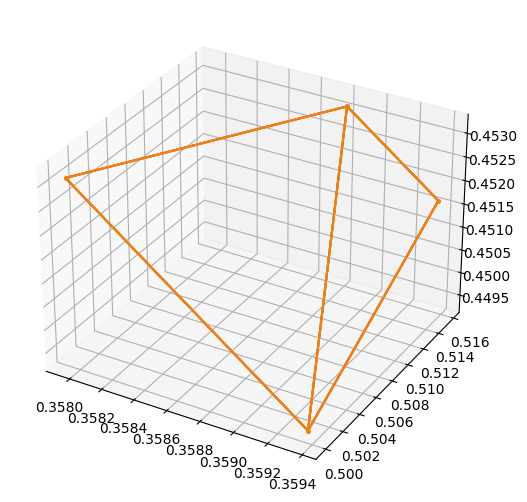

In [8]:
X = intersections
tri = scipy.spatial.Delaunay(intersections[:, 0:2])
#HC.vf_to_vv(tri.points, tri.simplices)
tri.simplices
HC = Complex(3)
points = intersections
for s in tri.simplices:
    for vi1 in s:
        v1 = HC.V[tuple(points[vi1])]
        for vi2 in s:
            v2 = HC.V[tuple(points[vi2])]
            v1.connect(v2)
HC.plot_complex()

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2831: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

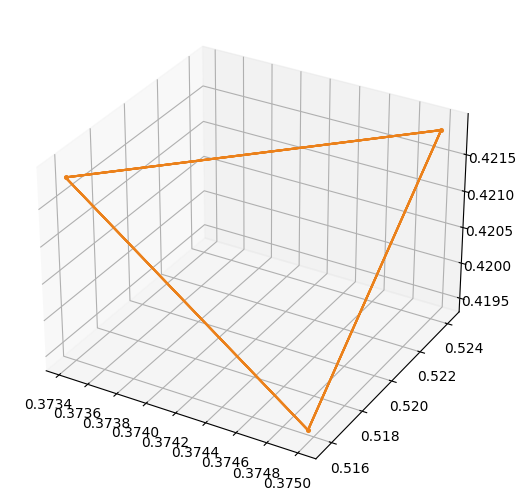

In [9]:
corners       = cell_corners_and_intersections[2]["Corners"]
intersections = cell_corners_and_intersections[16]["Intersections"]
points = intersections
tri = scipy.spatial.Delaunay(points[:, 0:2])
#HC.vf_to_vv(tri.points, tri.simplices)
tri.simplices
HC = Complex(3)
for s in tri.simplices:
    for vi1 in s:
        v1 = HC.V[tuple(points[vi1])]
        for vi2 in s:
            v2 = HC.V[tuple(points[vi2])]
            v1.connect(v2)
HC.plot_complex()

# Pseudo-triangulation algorithm


In [39]:
HC = Complex(3)
for index, c in enumerate(cell_corners_and_intersections):
    #if index % 25 == 0 or index == len(cell_corners_and_intersections) - 1:
    # Extract data
    corners       = c["Corners"]
    intersections = c["Intersections"]
    points = intersections
    tri = scipy.spatial.Delaunay(points[:, 0:2])
    #HC.vf_to_vv(tri.points, tri.simplices)
    tri.simplices

    for s in tri.simplices:
        for vi1 in s:
            v1 = HC.V[tuple(points[vi1])]
            for vi2 in s:
                v2 = HC.V[tuple(points[vi2])]
                v1.connect(v2)
    

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2831: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

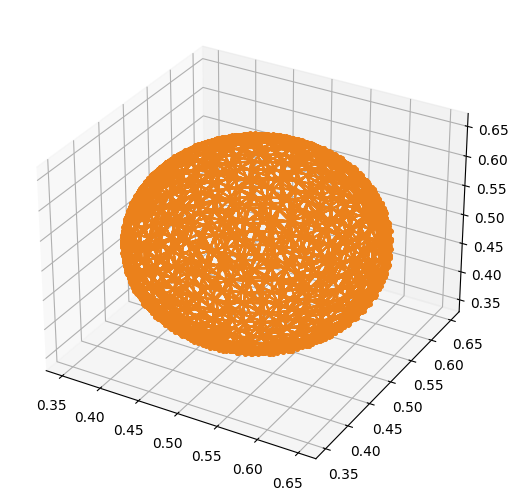

In [11]:
HC.plot_complex()

<IPython.core.display.Javascript object>


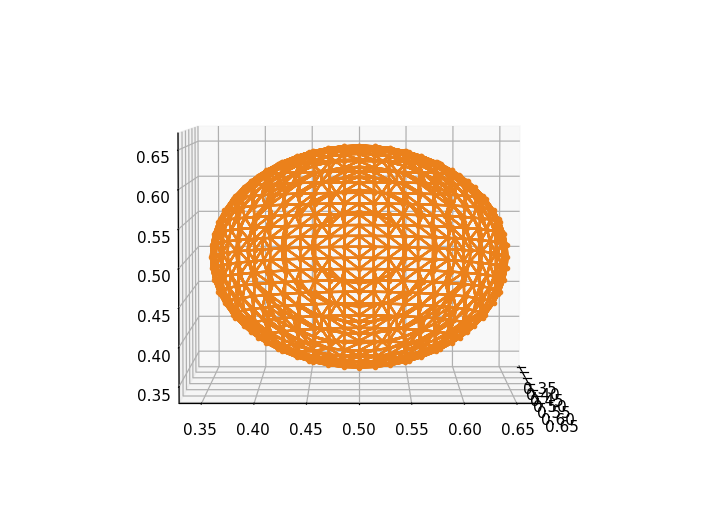

(0.35, 0.65)

In [40]:
%matplotlib notebook
X = np.array(X)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

In [12]:
HC.V.size()

1758

In [13]:
HC.V.merge_all(1e-12)
HC.V.size()

1758

# Attempt 2:


In [15]:
r = 1 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.48712788e-05, -1.80748472e-03, -4.32572169e-04],
        [ 6.48712788e-05,  1.80748472e-03, -4.32572169e-04],
        [ 0.00000000e+00,  1.85713235e-02,  2.68841104e-03],
        [-1.10550313e-02,  0.00000000e+00,  2.91193662e-02],
        [ 1.31186655e-02,  0.00000000e+00, -3.27663720e-02],
        [ 0.00000000e+00, -1.85713235e-02,  2.68841104e-03]],
       dtype=float128),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.48712788e-05,  1.80748472e-03,  4.32572169e-04],
        [ 2.87770531e-03,  1.75047660e-02,  0.00000000e+00],
        [ 6.92542052e-03,  0.00000000e+00, -1.82465942e-02],
        [-1.07933671e-03, -1.96359450e-02,  0.00000000e+00],
        [-5.14087417e-03,  0.00000000e+00,  1.88802184e-02]],
       dtype=float128),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.07933671e-03,  1.96359450e-02,  0.00000000e+00],
        [ 1.07933671e-03, -1.963594

In [16]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

#(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
# K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

# Comparison with analytical solution

The sphere has a radius of $r = 0.15$ m and therefore a point-wise mean ("fluid mean") curvature of $H = \frac{2}{r}$  and an area of $A = 4\pi r^2$

$$ \int H N dA = \frac{2}{r} \cdot 4\pi r^2 = 8 \pi r  $$

In [21]:
2/r, np.abs(np.array(HN_i)), (np.abs(np.array(HN_i))- 2/r)

(13.333333333333333827,
 array([ 4.94440276, 10.77232311, 10.20445594, ...,  8.09673355,
         9.45689825,  7.3213157 ], dtype=float128),
 array([-8.38893058, -2.56101022, -3.12887739, ..., -5.23659978,
        -3.87643508, -6.01201764], dtype=float128))

<IPython.core.display.Javascript object>


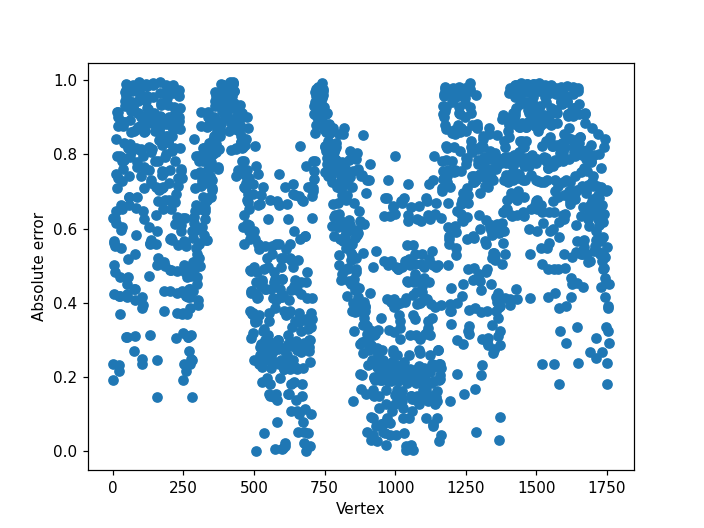

In [31]:
%matplotlib notebook
plt.scatter(list(range(len((np.abs(np.array(HN_i)))))), abs((np.abs(np.array(HN_i)) - 2/r))/(2/r) )
plt.ylabel('Absolute error')
plt.xlabel('Vertex')
plt.show()

In [23]:
np.sum(np.linalg.norm(HNdA_i, axis=1)), 8*np.pi*r

(3.7492912348202804412, 3.7699111843077515998)

In [24]:
abs((np.sum(np.linalg.norm(HNdA_i, axis=1)) - 8*np.pi*r)/8*np.pi*r)*100  # Error percentage

0.121461528426060017014

# Insight 

The total error for the coarse grid was 2.32%. The total error for the fine grid is 0.121%. Therefore, contrary to (DDG) expectactions, the error appears to improve with finer meshes.